# <center> practical session 2,3</center>
###### name  : Mohamed Salah-el-den Hussien
###### group : 5 

In [409]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as sk

class GD:
    def __init__(self , data , alpha=0.001 , epsilon = 0.05, batch_size=50 , max_iter = 1000 , show_line_history = False , gama = None , NAG=False):
        self.data     = data
        self.alpha    = alpha
        self.max_iter = max_iter
        self.number_of_data_points = data.shape[0]
        
        if batch_size == None: self.batch_size = self.number_of_data_points
        else:self.batch_size = batch_size
        
        self.number_of_parameters = data.shape[1]
        self.theta = np.zeros(self.number_of_parameters).reshape((self.number_of_parameters,1))
        self.number_of_batches = number_of_data_points // self.batch_size
        self.hypothesis = ""
        
        self.line_history  = []
        self.cost_history  = []
        self.theta_history = []
        self.counter = 0
        self.accuracy = 0
        self.show_line_history = show_line_history
        self.gama = gama
        self.f, self.axs = plt.subplots(2,2,figsize=(15,15))
        self.NAG = NAG
        self.v = 0
        self.epsilon = epsilon
        
    def __str__(self):
        return f'''
        ==================================================================================================
        data summery--------------------------
        
                data shape             : {self.data.shape}
                number of DP           : {self.number_of_data_points}
                number of arguments    : {self.number_of_parameters}
        
        hyper parameter-----------------------
                
                alpha                  : {self.alpha}
                gama                   : {self.gama}
                batch size             : {self.batch_size}
                number of batches      : {self.number_of_batches}
                Momentum-based GD      : {self.gama != None}
                Nesterov Accelerated GD: {self.NAG}
        
        output ----------------------------
                
                hypothesis             : {self.hypothesis}
                accuracy               : {self.accuracy}
        ==================================================================================================
        ''' 
    
    def printData(self):
        print(self.data)
        
    def prepareData(self):
        ones_column = np.ones(self.number_of_data_points).reshape((self.number_of_data_points , 1))
        features = np.concatenate((ones_column,self.data[:,:-1]) , axis = 1)
        labels   = (self.data[:,-1]).reshape((self.number_of_data_points , 1))
        return (features , labels)
    
    def initializeThetasRandomly(self):
        for i in range(self.number_of_parameters):
            self.theta[i,0] = np.random.random()
    
        
    def hypo(self, x):
        h = x @ self.theta
        return h
        
    def cost(self , x , y):
        m = x.shape[0]
        h = self.hypo(x)
        J = (1/(2*m))  * np.sum((h-y)**2)
        return J
    
    def grad(self , x , y):
        m = x.shape[0]
        h = self.hypo(x)
        g = ((1/m) * ((h-y).T @ x)).T
        return g
    
    def updateThetasWithNesterov(self , x , y):
        
        theta_temp = self.theta - (self.gama * self.v)
        grad = self.grad(x , y)
        self.theta = self.theta - (self.alpha * grad)
        
        self.v = self.gama * self.v + self.alpha * grad
        
    
    def updateThetasWithMomentum(self , grad):
        self.v = (self.gama * self.v) + (self.alpha * grad)
        self.theta = self.theta - self.v
    
    def updateThetas(self , grad):
        self.theta = self.theta - (self.alpha * grad)
        
    def counterStop(self):
        if(self.counter >= self.max_iter):return True
        return False
    
    def gradStop(self , grad):
        if(abs(np.sum(grad)) <= self.epsilon): return True
        return False
        
    
    def fit(self):
        x , y = self.prepareData();
        
        self.initializeThetasRandomly()
        
        idx = list(range(0,self.number_of_data_points+1 , self.batch_size))
        grad   = self.grad(x , y)
        while (self.gradStop(grad) == False) and (self.counterStop() == False) :
            for i in range(self.number_of_batches):
                
                mini_x =  x[ idx[i] : idx[i+1] , : ] 
                mini_y =  y[ idx[i] : idx[i+1] , : ]
                grad   = self.grad(mini_x , mini_y)
                

                if  (self.gama == None): self.updateThetas(grad)
                elif(self.NAG  == True): self.updateThetasWithNesterov(mini_x , mini_y)
                else                   : self.updateThetasWithMomentum(grad)                
                
                if(self.show_line_history):self.axs[0,0].plot(x , self.hypo(x) , alpha=0.2)
                
                self.cost_history.append(self.cost(mini_x , mini_y))
                self.theta_history.append([self.theta[0,0] , self.theta[1,0]])
            self.counter += 1
            if (self.counter % (self.max_iter // 30) == 0):
                print(f"\tepoch #{self.counter} accuracy\t: {round(self.calculateAccurecy(y , self.hypo(x))*100 , 3)} \t gradiant \t: {abs(np.sum(grad))}")
        
        print(f"done\n\tepoch #{self.counter} accuracy\t: {round(self.calculateAccurecy(y , self.hypo(x))*100 , 3)} \t gradiant \t: {abs(np.sum(grad))}")
        
        self.theta_history = np.array (self.theta_history)
        self.accuracy = self.calculateAccurecy(mini_y , self.hypo(mini_x))*100
        self.hypothesis = self.model()
    
    def predict(self , x):
        ones_column = np.ones(x.shape[0]).reshape((x.shape[0] , 1))
        new_x       = np.concatenate((ones_column,x) , axis = 1)
        h           = self.hypo(new_x)
        return h
        
    def graphs(self):
        self.axs[0,0].title.set_text("best fit line")
        self.axs[0,0].set_xlabel("input")
        self.axs[0,0].set_ylabel("output")
        self.axs[0,0].plot(xi , self.predict(xi) , c='r')
        self.axs[0,0].scatter(self.data[:,0] , self.data[:,1])
        
        self.axs[0,1].title.set_text("optimizing cost function")
        self.axs[0,1].set_xlabel("iteration number")
        self.axs[0,1].set_ylabel("cost function")
        self.axs[0,1].plot(self.cost_history[:100] ,  marker="o")
        
        self.axs[1,0].set_xlabel("theta 0")
        self.axs[1,0].set_ylabel("cost")
        self.axs[1,0].title.set_text("optimizing parameter")
        self.axs[1,0].plot(model.theta_history[:,0] , model.cost_history[:] , marker="o")
        
        
        self.axs[1,1].set_xlabel("theta 1")
        self.axs[1,1].set_ylabel("cost")
        self.axs[1,1].title.set_text("optimizing parameter")
        self.axs[1,1].plot(model.theta_history[:,1] , model.cost_history[:] , marker="o")
        
    def model(self):
        result  = ""
        for i in range (self.number_of_parameters-1):
            result += f"{round(self.theta[i+1,0] , 3)} * "
            result += "x"+str(i+1) + " + "
        result += f"{round(self.theta[0,0] , 3)}"
        return result
        
    def calculateAccurecy(self , y_true , y_pred):
        return sk.r2_score(y_true , y_pred)

In [382]:
number_of_data_points = 100
a ,b = -2 , 1

np.random.seed()
xi = (np.random.random(number_of_data_points)*20).reshape((number_of_data_points,1))
yi = (a*xi + b)
data = np.concatenate((xi , yi) , axis= 1)


# <center>Batch Gradient descent </center>

done
	epoch #9 accuracy	: 99.942 	 gradiant 	: 0.03980790133927577

        data summery--------------------------
        
                data shape             : (100, 2)
                number of DP           : 100
                number of arguments    : 2
        
        hyper parameter-----------------------
                
                alpha                  : 0.005
                gama                   : None
                batch size             : 100
                number of batches      : 1
                Momentum-based GD      : False
                Nesterov Accelerated GD: False
        
        output ----------------------------
                
                hypothesis             : -1.958 * x1 + 0.466
                accuracy               : 99.94230834617338
        


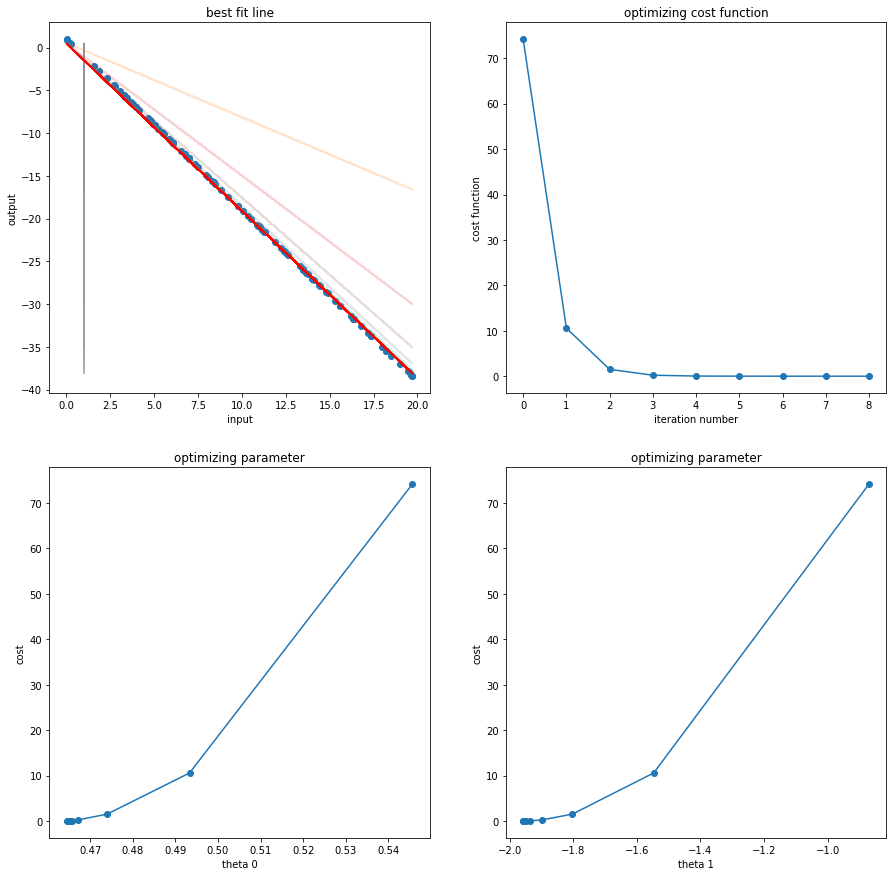

In [416]:
model = GD(data , batch_size=100 ,epsilon=0.05 ,alpha = 0.005 ,   max_iter=1000 , show_line_history=True); model.fit(); model.graphs(); print(model)

# <center>stochastic Gradient descent </center>

	epoch #33 accuracy	: 99.969 	 gradiant 	: 7.050837596944059
	epoch #66 accuracy	: 99.994 	 gradiant 	: 3.1429933188405204
	epoch #99 accuracy	: 99.999 	 gradiant 	: 1.401026029383543
	epoch #132 accuracy	: 100.0 	 gradiant 	: 0.6245237376879608
	epoch #165 accuracy	: 100.0 	 gradiant 	: 0.2783887599200964
	epoch #198 accuracy	: 100.0 	 gradiant 	: 0.12409504550876609
done
	epoch #222 accuracy	: 100.0 	 gradiant 	: 0.06895351977229518

        data summery--------------------------
        
                data shape             : (100, 2)
                number of DP           : 100
                number of arguments    : 2
        
        hyper parameter-----------------------
                
                alpha                  : 0.001
                gama                   : None
                batch size             : 1
                number of batches      : 100
                Momentum-based GD      : False
                Nesterov Accelerated GD: False
        
        o

C:\Users\moham\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


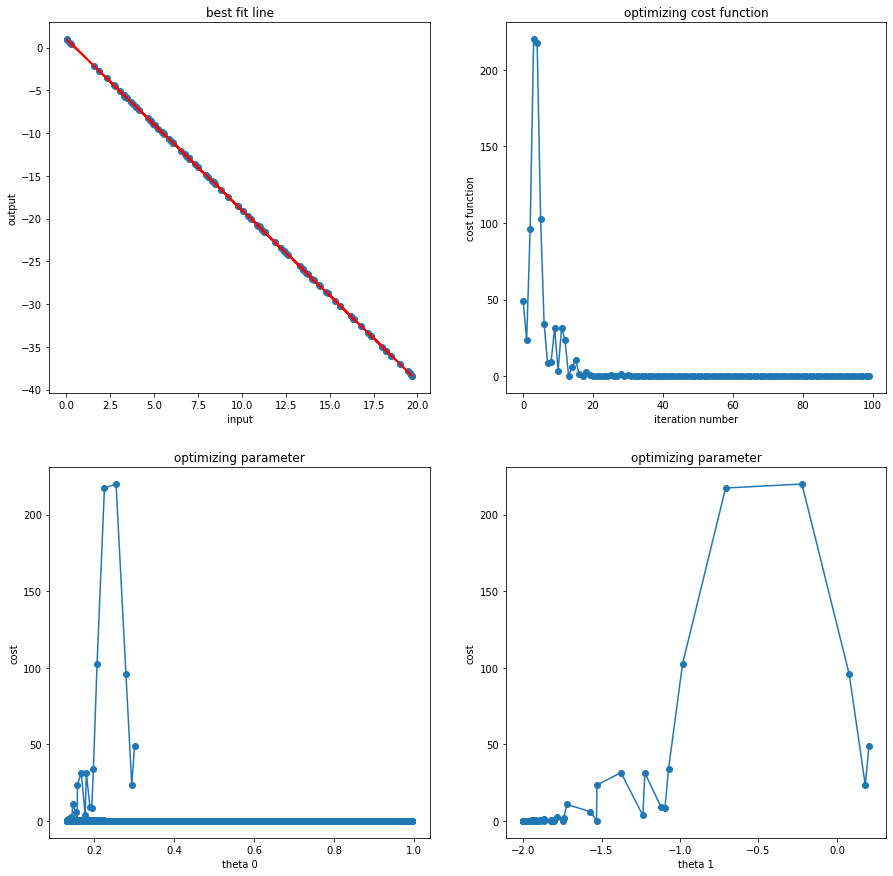

In [410]:
model = GD(data , batch_size=1, epsilon=0.07 , max_iter=1000); model.fit(); model.graphs(); print(model)

# <center>mini batch Gradient descent </center>

done
	epoch #11 accuracy	: 99.993 	 gradiant 	: 0.0013700681340269374

        data summery--------------------------
        
                data shape             : (100, 2)
                number of DP           : 100
                number of arguments    : 2
        
        hyper parameter-----------------------
                
                alpha                  : 0.001
                gama                   : None
                batch size             : 20
                number of batches      : 5
                Momentum-based GD      : False
                Nesterov Accelerated GD: False
        
        output ----------------------------
                
                hypothesis             : -1.984 * x1 + 0.815
                accuracy               : 99.99157421847933
        


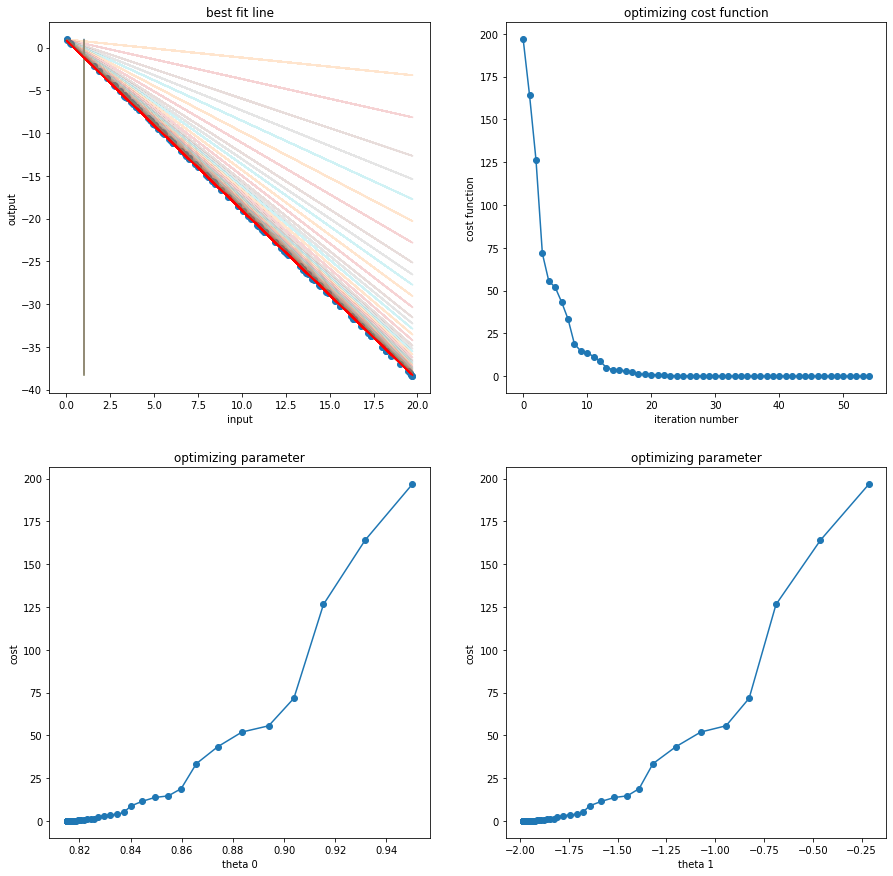

In [427]:
model = GD(data , batch_size=20 , epsilon=0.05 , max_iter=1000 , show_line_history=True); model.fit(); model.graphs(); print(model)

# <center>Momentum-based GD </center>

	epoch #3 accuracy	: -311.436 	 gradiant 	: 173.1535172289777
	epoch #6 accuracy	: -61.861 	 gradiant 	: 77.08766694305423
	epoch #9 accuracy	: 49.645 	 gradiant 	: 19.729731669677182
	epoch #12 accuracy	: 89.075 	 gradiant 	: 10.128234684366774
	epoch #15 accuracy	: 99.005 	 gradiant 	: 22.266854358674774
	epoch #18 accuracy	: 99.943 	 gradiant 	: 24.1731328729415
	epoch #21 accuracy	: 99.406 	 gradiant 	: 21.022213754587934
	epoch #24 accuracy	: 99.21 	 gradiant 	: 16.05484825313563
	epoch #27 accuracy	: 99.367 	 gradiant 	: 11.075079297853362
	epoch #30 accuracy	: 99.616 	 gradiant 	: 6.920510510756882
	epoch #33 accuracy	: 99.811 	 gradiant 	: 3.8413825106332835
	epoch #36 accuracy	: 99.924 	 gradiant 	: 1.774149041810248
	epoch #39 accuracy	: 99.975 	 gradiant 	: 0.5205385308653921
	epoch #42 accuracy	: 99.994 	 gradiant 	: 0.14703643411761516
	epoch #45 accuracy	: 99.999 	 gradiant 	: 0.4317685358550619
	epoch #48 accuracy	: 100.0 	 gradiant 	: 0.4916501745391571
	epoch #51 accur

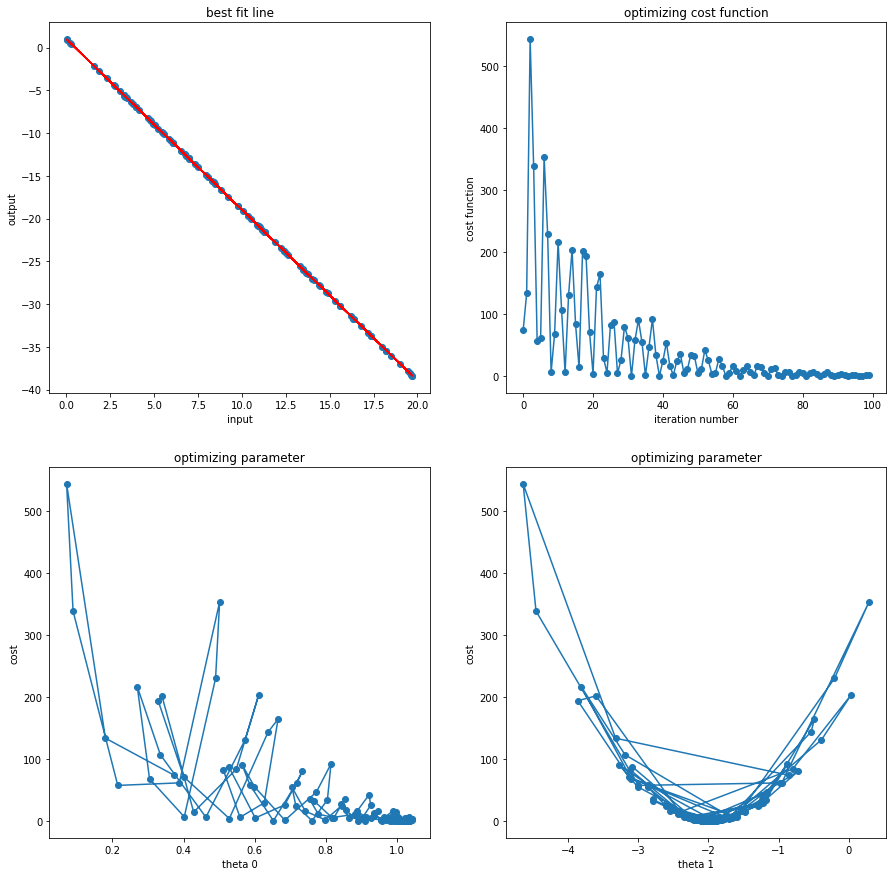

In [419]:
model = GD(data , batch_size=20 ,alpha = 0.05, max_iter=100 , gama=0.95 ); model.fit(); model.graphs(); print(model)

# <center>Nesterov Accelerated GD </center>

	epoch #3 accuracy	: 92.478 	 gradiant 	: 32.433947722181664
	epoch #6 accuracy	: 99.774 	 gradiant 	: 3.895858198438317
	epoch #9 accuracy	: 99.91 	 gradiant 	: 0.026860475304177428
done
	epoch #9 accuracy	: 99.91 	 gradiant 	: 0.026860475304177428

        data summery--------------------------
        
                data shape             : (100, 2)
                number of DP           : 100
                number of arguments    : 2
        
        hyper parameter-----------------------
                
                alpha                  : 0.001
                gama                   : 0.95
                batch size             : 20
                number of batches      : 5
                Momentum-based GD      : True
                Nesterov Accelerated GD: True
        
        output ----------------------------
                
                hypothesis             : -1.943 * x1 + 0.343
                accuracy               : 99.89332378391617
        


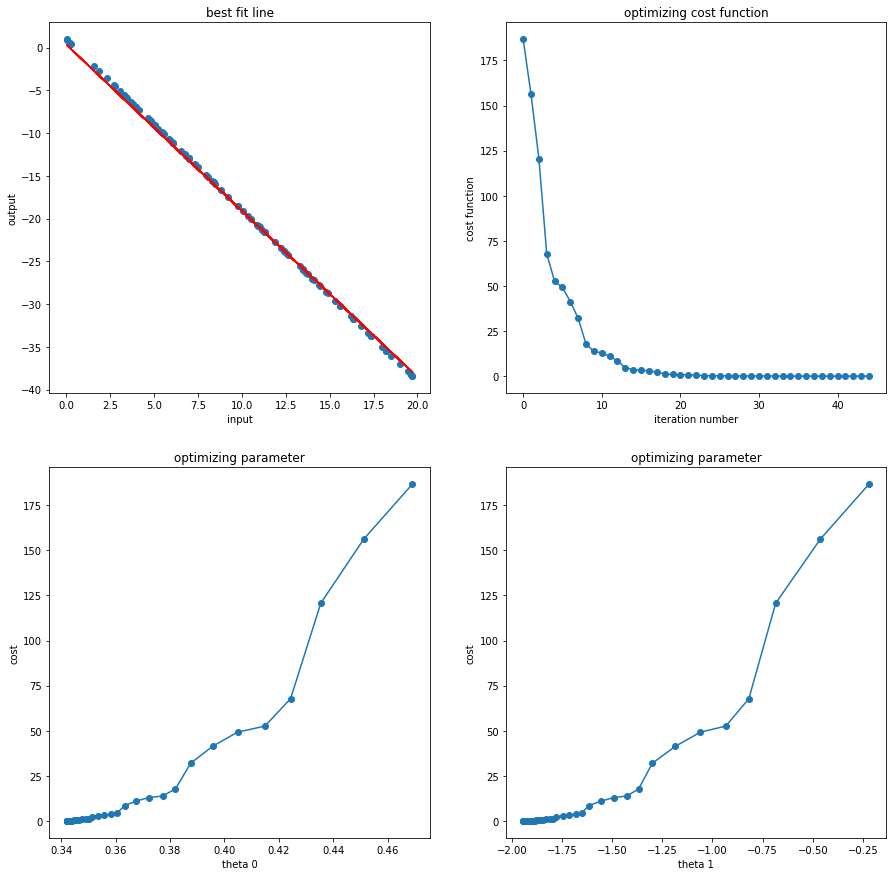

In [424]:
model = GD(data , batch_size=20 , max_iter=100 , gama=0.95 , NAG=True); model.fit(); model.graphs(); print(model)